<a href="https://colab.research.google.com/github/claubermartins/detector-de-mascaras-com-python/blob/master/detector_de_mascaras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-Importando Biliotecas

In [530]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#2-Método de importação de arquivos do Google Colab

In [531]:
from google.colab import files
upload = files.upload()
print("downloaded files: ")
print(*upload, sep = "\n")

Saving pessoas.jpeg to pessoas.jpeg
downloaded files: 
pessoas.jpeg


#3-Importando a imagem

In [532]:
#lendo a imagem com OpenCV
imagem = cv.imread("pessoas.jpeg")

In [533]:
#No OpenCV imagem é lida como um array no tipo da biblioteca
type(imagem)

numpy.ndarray

In [534]:
#mostrando a imagem
#cv.imshow("Nome da janela", imagem)

In [535]:
#Função para mostrando a imagem
def mostrar_imagem(imagem):
#covertendo o formato da imagem RGB para o BGR do OpenCV
  imagem_rgb = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
  plt.imshow(imagem_rgb)

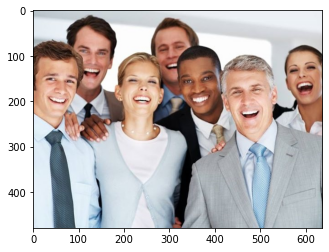

In [536]:
#mostrando a imagem
mostrar_imagem(imagem)

#4-Pré-processamento
####Neste módulo é feito um tratamento da imagem diminuindo o ruído para facilitar a detecção de um rosto na imagem e o método CascadeClassifier do algoritmo Viola-Jones para detecção de faces.

In [537]:
#covertendo a imagem para a escala de cinza
imagem_cinza = cv.cvtColor(imagem, cv.COLOR_BGR2GRAY)

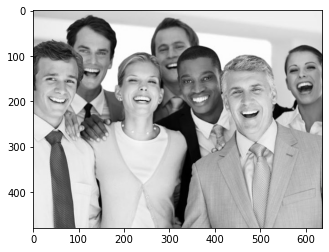

In [538]:
mostrar_imagem(imagem_cinza)

In [539]:
#Acessando arquivo para identificar faces frontais
#features_haar = "haarcascade_frontalface_alt2.xml"
#features_haar = "haarcascade_frontalface_alt.xml" #bom
#features_haar = "haarcascade_frontalface_alt_tree.xml"
features_haar = "haarcascade_frontalface_default.xml"

In [540]:
#utilizando o atributo haarcascades do OpenCV
caminho = f"{cv.haarcascades}/{features_haar}"

In [541]:
#Instanciando o modelo de classificação passando os recursos de Haar como parâmetro
classificador = cv.CascadeClassifier(caminho)

In [542]:
#Fazendo a predição utilizando o método detectMultiScale e passando a imagem na escala cinza
#resultando numa matriz de coordenadas que indica a localização dos rostos
faces = classificador.detectMultiScale(imagem_cinza)

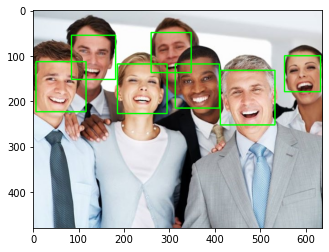

In [543]:
#Percorrendo a matriz e desenhando um retangulo em volta da face
imagem_copia = np.array(imagem)
for (x,y,w,h) in faces:
  cv.rectangle(imagem_copia, (x,y), (x+w, y+h), (0,255,0), 2)
mostrar_imagem(imagem_copia)